In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 기초 통계 개념정리

## 1) 대푯값 : 데이터의 중심을 나타내는 값
- 평균(mean)
- 중앙값(median)
- 최빈값(mode)

### (1) 평균(mean) $ \mu $
- 모든 값의 총합을 값의 개수로 나눈 값
- 극단적인 값(이상값)이 있는 경우 평균에 영향을 미침
- 모집단의 평균 $ \mu $
- 표본집단의 평균 $ \bar{x} $
$$ 모평균 : \mu = {\sum_{i=1}^N x_i \over n} $$
$$ 포본평균 : \bar{x} = {\sum_{i=1}^N x_i \over n} $$

In [2]:
# 평균
a = [2,3,3,4,4,5,7,7,7,8]
sum(a) / len(a)

5.0

In [3]:
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns = ['표본'])
a

,표본
0,2
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7
9,8


In [4]:
# 평균
a.mean()

표본    5.0
dtype: float64

### (2) 중앙값(median)
- 모든 데이터를 큰 순서대로 나열할 때 가운데 있는 값
- 데이터의 개수가 홀수일 때는 정중앙의 값
- 데이터의 개수가 짝수일 때는 정중앙 3개 값의 수익 평균값
- 이상치가 있어도 영향을 받지 않는다.

In [5]:
a.median()

표본    4.5
dtype: float64

In [6]:
b = a.copy()

In [7]:
b.drop(0, inplace = True)
b

,표본
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7
9,8


In [8]:
b.median()

표본    5.0
dtype: float64

### (3) 최빈값(mode)
- 표본에서 가장 많이 등장하는 값
- 최빈값도 극단값에 영향을 받지 않음

In [9]:
b.mode()

,표본
0,7


### (4) 산술평균 / 기하평균
- 산술평균(덧셈의 평균) : 모든 데이터의 합계 / 데이터의 수
- 기하평균(곱셉의 평균) : 모든 데이터의 곱의 n 제곱근 - 증가율의 평균을 계산할 때 사용

In [12]:
# 산술평균
# (2+3+3+4+4+5+7+7+7+8) / 10
print(a.mean())
print('a의 산술평균 :', (2+3+3+4+4+5+7+7+7+8) / 10)

표본    5.0
dtype: float64
a의 산술평균 : 5.0


In [13]:
# 기하평균
math.pow((2*3*3*4*4*5*7*7*7*8), 1/10)

4.567459024554638

In [14]:
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
print('기하평균은 ', geometric_mean)

기하평균은  4.567459024554637


2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [15]:
print('산술평균 :', pd.Series([7, 35, 40, 69]).mean())

산술평균 : 37.75


In [16]:
print('기하평균 :', gmean([7, 35, 40, 69]))

기하평균 : 28.67601451933219


## 2) 도수분포표와 히스토그램
### (1) 도수분포표
- 주어진 데이터를 일정한 범위로 나누고 그 범위에 출현하는 데이터 개수를 조사해 나타낸 표
- 데이터의 구간 폭을 계급(class)이라고 함. 각 계급에 속하는 데이터 개수를 '도수'라고 함.
- 각 계급의 중앙값을 '계급값'이라고 함
- 도수분포표에서 도수가 큰 것을 출현 횟수가 많다고 함
- 가장 도수가 큰 계급의 계급값을 최빈값이라고 함

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [19]:
ages = data[['Age']]
ages

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [20]:
# value_counts로 도수분포표 만들기
ages.value_counts()

Age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: count, Length: 88, dtype: int64

In [23]:
# 계급 구간을 10단위로 나눠 도수분포표를 만들고
# 도수분포표를 시각화한 히스토그램 그려보기
# 도수분포표(frequency distribution table)
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
fdt = pd.cut(ages['Age'].values, bins = bins, labels = labels, right = False)
fdt

['20s', '30s', '20s', '30s', '30s', ..., '20s', '10s', NaN, '20s', '30s']
Length: 891
Categories (9, object): ['under10s' < '10s' < '20s' < '30s' ... '50s' < '60s' < '70s' < '80s']

In [24]:
fdt.value_counts() # 도수분포표

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64

<Axes: >

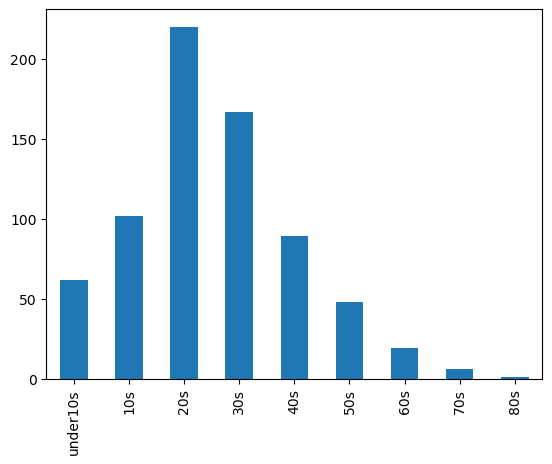

In [25]:
# 도수분포표를 막대 차트로 그리기
fdt.value_counts().plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='Count'>

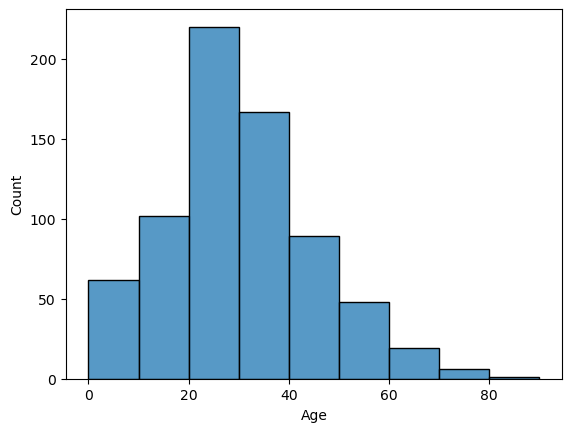

In [26]:
# 히스토그램 그리기
sns.histplot(ages['Age'], bins = bins)

### (2) 상대도수분포표(relative frequency distribution tabel)
- 상대도수 : 계급의 도수 / 전체 도수의 합계. 어떤 계급의 도수가 전체 도수의 몇 퍼센트를 차지하는지 나타내는 값
- 상대도수분포표 : 모든 계급의 상대도수를 구해서 더한 거

In [27]:
fdt_df = pd.DataFrame(fdt.value_counts())
fdt_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [31]:
# 상대도수분포표 만들기
# 상대도수 : 계급의 도수 / 전체 도수의 합계
fdt_df['rfdt'] = round(fdt_df['count'] / fdt_df['count'].sum(), 3) * 100
fdt_df['rfdt']

under10s     8.7
10s         14.3
20s         30.8
30s         23.4
40s         12.5
50s          6.7
60s          2.7
70s          0.8
80s          0.1
Name: rfdt, dtype: float64

In [32]:
fdt_df

,count,rfdt
under10s,62,8.7
10s,102,14.3
20s,220,30.8
30s,167,23.4
40s,89,12.5
50s,48,6.7
60s,19,2.7
70s,6,0.8
80s,1,0.1


<Axes: >

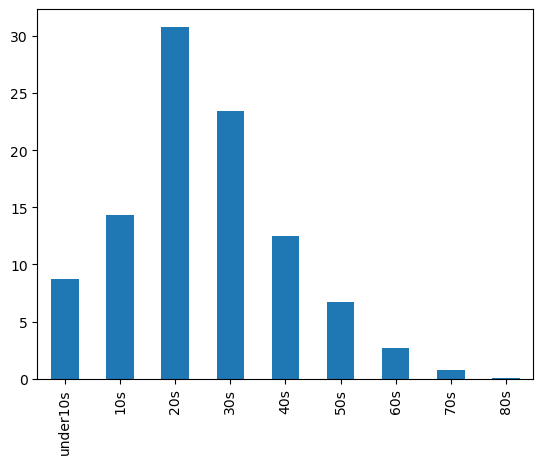

In [33]:
fdt_df['rfdt'].plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='Probability'>

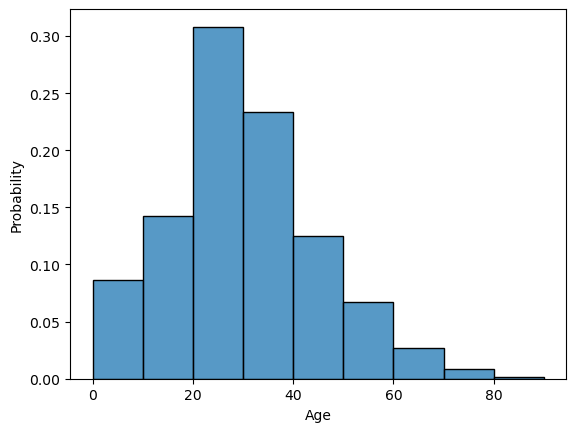

In [35]:
sns.histplot(ages['Age'], bins = bins, stat = 'probability', kde = False)

### 구간화가 필요한 데이터에서 계급의 개수를 몇 개로 해야할지
- 스터지스 공식 : 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 기준이 되는 공식
    - 전체 데이터 개수를 $ 2^n $이라 하고, 그때 계급 수를 $ n+1 $로 한다.

In [36]:
len(ages['Age'])

891

In [38]:
# 891은 2의 몇 승일까요? n이 나오면 n+1 하면 됨
n = math.log(891, 2)
print(round(n+1))

11


## 3) 편차(deviation)
- 데이터와 평균이 떨어진 거리, 데이터와 평균 값과의 차이
- 데이터 - 평균값

In [42]:
a['평균'] = a['표본'].mean()
a

,표본,평균
0,2,5.0
1,3,5.0
2,3,5.0
3,4,5.0
4,4,5.0
5,5,5.0
6,7,5.0
7,7,5.0
8,7,5.0
9,8,5.0


In [43]:
a['편차'] = a['표본'] - a['평균']

In [44]:
a

,표본,평균,편차
0,2,5.0,-3.0
1,3,5.0,-2.0
2,3,5.0,-2.0
3,4,5.0,-1.0
4,4,5.0,-1.0
5,5,5.0,0.0
6,7,5.0,2.0
7,7,5.0,2.0
8,7,5.0,2.0
9,8,5.0,3.0


## 4) 분산(variance) : 편차 제곱의 합 / 데이터 수
- 모분산 : $ \sigma^2 $ <br>
$ \sigma^2 = {\sum(x_i-\mu)^2 \over n} $ 
- 표본분산 : $ s^2 $ <br>
$ s^2 = {\sum(x_i-\bar{x})^2 \over n-1} $ 

In [45]:
# 분산 : 편차제곱의 합 / 데이터 수
# 모분산
a['편차제곱'] = a['편차'] ** 2
a

,표본,평균,편차,편차제곱
0,2,5.0,-3.0,9.0
1,3,5.0,-2.0,4.0
2,3,5.0,-2.0,4.0
3,4,5.0,-1.0,1.0
4,4,5.0,-1.0,1.0
5,5,5.0,0.0,0.0
6,7,5.0,2.0,4.0
7,7,5.0,2.0,4.0
8,7,5.0,2.0,4.0
9,8,5.0,3.0,9.0


In [46]:
a['분산'] = a['편차제곱'].sum() / len(a['편차제곱'])
a

,표본,평균,편차,편차제곱,분산
0,2,5.0,-3.0,9.0,4.0
1,3,5.0,-2.0,4.0,4.0
2,3,5.0,-2.0,4.0,4.0
3,4,5.0,-1.0,1.0,4.0
4,4,5.0,-1.0,1.0,4.0
5,5,5.0,0.0,0.0,4.0
6,7,5.0,2.0,4.0,4.0
7,7,5.0,2.0,4.0,4.0
8,7,5.0,2.0,4.0,4.0
9,8,5.0,3.0,9.0,4.0


In [47]:
# 분산함수 .var()
# 표본분산을 계산해준다고 함
a['표본'].var()

4.444444444444445

In [50]:
a['표본분산'] = a['편차제곱'].sum() / (len(a['편차제곱']) - 1)
a

,표본,평균,편차,편차제곱,분산,표본분산
0,2,5.0,-3.0,9.0,4.0,4.444444
1,3,5.0,-2.0,4.0,4.0,4.444444
2,3,5.0,-2.0,4.0,4.0,4.444444
3,4,5.0,-1.0,1.0,4.0,4.444444
4,4,5.0,-1.0,1.0,4.0,4.444444
5,5,5.0,0.0,0.0,4.0,4.444444
6,7,5.0,2.0,4.0,4.0,4.444444
7,7,5.0,2.0,4.0,4.0,4.444444
8,7,5.0,2.0,4.0,4.0,4.444444
9,8,5.0,3.0,9.0,4.0,4.444444


## 5) 표준편차(standard diviation) : 분산의 제곱근
- 모집단의 표준편차 : $ \sigma $ <br>
$ \sigma = \sqrt{\sum(x_i-\mu)^2 \over n} $ 
<br>

- 표본의 표준편차 : $ s $<br>
$ s = \sqrt{\sum(x_i-\bar{x})^2 \over n-1} $ 

In [51]:
a['표준편차'] = a['분산'].apply(math.sqrt)
a

,표본,평균,편차,편차제곱,분산,표본분산,표준편차
0,2,5.0,-3.0,9.0,4.0,4.444444,2.0
1,3,5.0,-2.0,4.0,4.0,4.444444,2.0
2,3,5.0,-2.0,4.0,4.0,4.444444,2.0
3,4,5.0,-1.0,1.0,4.0,4.444444,2.0
4,4,5.0,-1.0,1.0,4.0,4.444444,2.0
5,5,5.0,0.0,0.0,4.0,4.444444,2.0
6,7,5.0,2.0,4.0,4.0,4.444444,2.0
7,7,5.0,2.0,4.0,4.0,4.444444,2.0
8,7,5.0,2.0,4.0,4.0,4.444444,2.0
9,8,5.0,3.0,9.0,4.0,4.444444,2.0


In [52]:
# 표준편차를 구하는 함수 .std() -> 표본의 표준편차를 구함
a['표본'].std()

2.1081851067789197

In [53]:
a['표본표준편차'] = a['표본분산'].apply(math.sqrt)
a

,표본,평균,편차,편차제곱,분산,표본분산,표준편차,표본표준편차
0,2,5.0,-3.0,9.0,4.0,4.444444,2.0,2.108185
1,3,5.0,-2.0,4.0,4.0,4.444444,2.0,2.108185
2,3,5.0,-2.0,4.0,4.0,4.444444,2.0,2.108185
3,4,5.0,-1.0,1.0,4.0,4.444444,2.0,2.108185
4,4,5.0,-1.0,1.0,4.0,4.444444,2.0,2.108185
5,5,5.0,0.0,0.0,4.0,4.444444,2.0,2.108185
6,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
7,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
8,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
9,8,5.0,3.0,9.0,4.0,4.444444,2.0,2.108185


## 6) 표준점수(standard score), z-score
- 데이터 값(포인트)이 평균으로부터 얼마나 떨어져 있는지를 나타내는 지표
- 이는 데이터 포인트가 평균에서 몇 표준편차 떨어져 있는지를 나타내며
- 데이터의 상대적인 위치를 이해하는 데 유용하다.

- 모집단 표준점수(Z-score) z<br>
$ Z = {x_i - \mu \over \sigma}$ <br><br>

- 표본집단의 표준점수(Z-score) z<br>
$ Z = {x_i - \bar{x} \over s}$

# 자유도(degrees of freedom)란?
- 데이터의 독립적인 정보의 수
- [2,3,4,5,6]의 평균은 4
- 통계는 표본을 추출해서 계산
- 모평균이 4.0이니
- 표본평균도 4.0이 되어야 함. 그래야 모평균을 설명할 수 있기 때문.
- 평균값을 유지하기 위해서 마지막 데이터 포인트는 고정돼야 하고 고정된 포인트 이외의 값들은 자유롭게 변할 수 있다.

- 표본 [4,2,5,7,x]의 평균은 4.0이 돼야 함.
- x에 어떤 값이 오든 4가 돼야 하기 때문에 1개를 비워둬야 함. 왜냐면 표본으로 뽑힌 것들을 평균을 4로 만들어야 하기 때문에 남은 1개로
- 4를 맞춰주려고 함

# 가설검정 t-test
- t-test는 두 집단의 평균을 비교해 차이가 있는지 확인하는 통계적 방법

### 1) 일 표본 단측 t-검정 (한 쪽으로 방향성을 갖는 경우)
- 모수에 대한 검정을 할 때 모수 값이 -보다 크다, 혹은 ~보다 작다와 같이 한쪽으로의 방향성을 갖는 경우 수행되는 검정 방법
- 00공장에서 생산되는 지우개의 평균 중량은 50g 이하다 (귀무 가설)
- 00공장에서 생산되는 지우개의 평균 중량은 50g 초과다 (대립 가설)

In [55]:
# 통계와 회귀분석에 특화되어 있는 라이브러리
# !pip install statsmodels

In [60]:
# 일 표본 단축 t-검정을 위해 지우개 10개의 표본 추출
weights = np.random.uniform(49, 52, 10)
print(weights)
print('지우개의 평균 : ', weights.mean())

[49.50292531 49.82936814 50.62272755 51.82196725 51.80750075 51.32477138
 50.71629885 49.13810283 51.83046274 51.07613253]
지우개의 평균 :  50.76702573171657


In [61]:
import statsmodels.stats.weightstats as stests
from scipy import stats

In [62]:
# 일 표본 단측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 50, alternative = 'greater')
print(f'T-통계량은 {t_stat} P-value는 {p_value}')

T-통계량은 2.4409268900400853 P-value는 0.018653935426707208


- p-value가 0.018이므로 유의수준인 0.05보다 작기 때문에 귀무가설은 기각, 대립가설 채택
- 00공장에서 생산되는 지우개의 평균 중량을 50 초과다(대립가설) 채틱

### 2) 일 표본 양측 t-test (방향성이 없는 경우)
- 단측 검정과 달리 모수 값이 ~이다, ~이 아니다와 같이 방향성이 없는 경우 수행되는 검정 방법
- 대한민국 남성의 평균 몸무게는 70 kg다. 는 귀무가설
- 대한민국 남성의 평균 몸무게는 70 kg이 아니다. 는 대립가설

In [70]:
# 일 표본 양측 t-test를 위한 40kg~100kg 사이 남성 100명의 표본 추출
weights = np.random.uniform(40, 100, 100)
print(len(weights), '몸무게 평균은 : ', weights.mean())

100 몸무게 평균은 :  72.06281104593302


In [71]:
# 일 표본 양측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 70, alternative = 'two-sided')
print(f'T-통계량은 {t_stat} P-value는 {p_value}')

T-통계량은 1.1721206227779712 P-value는 0.24396157575487


### 3) 독립 이 표본 t-test (independentsample t-test)
- 서로 독립적인 두 개의 집단에 대하여 모수(모평균)의 값이 같은 값을 갖는지 통계적으로 검정하는 방법
- 여기서 독립이란 두 모집단에서 각각 추출된 두 표본이 서로 관계가 없다는 것을 의미
- 두 모집단의 분산이 같음을 의미하는 등분산성을 만족해야 함
    - 분산이 같아야 비교가 가능하다고 함
- 따라서 이 표본 t검정을 수행하기 전에 등분산 검정(F 검정)을 먼저 수행해야 함.

### 4) 이 표본 단측 t 검정(~보다 크다, 작다)
- 두 집단에 대해서 모수 비교를 할 때 A가 B보다 크다/작다를 비교하는 검정
- A 회사의 급여가 B 회사의 급여보다 같거나 많다 (귀무가설)
- A 회사의 급여가 B 회사의 급여보다 적다 (대립가설)

In [72]:
# 랜덤하게 급여 생성
salaryA = np.random.uniform(250, 380, 100)
salaryB = np.random.uniform(200, 400, 100)
print(salaryA.mean(), salaryB.mean())

314.71263388633065 299.09021509203205


In [75]:
t_stat, p_value = stats.ttest_ind(salaryA, salaryB, alternative = 'less')
print(t_stat, p_value)

2.246303492418515 0.9871055404126051


### 5) 이 표본 양측 t검정 (A와 B는 같다/다르다)
- K와 L의 달리기 속도는 같다 (귀무가설)

In [76]:
# 랜덤한 속도 생성
speedK = np.random.uniform(30, 40, 100)
speedL = np.random.uniform(25, 35, 100)
print(speedK.mean(), speedL.mean())

34.943109767246945 29.274537126249015


In [77]:
t_stat, p_value = stats.ttest_ind(speedK, speedL)
print(f'T-통계량 : {t_stat}, p밸류 : {p_value}')

T-통계량 : 13.195652017057958, p밸류 : 6.125879822257878e-29


### 6) 대응 표본 t 검정(paired t-test)
- 실험 전후 비교
- 동일한 대상에 대해 두 가지 관측치가 있는 경우 이를 비교하여 차이가 있는지 검정할 때 사용
- 두 집단에 신약 투여 후 전후 수치 비교, 새로운 정책이 시행된 후 부동산 가격의 전후 변화 등
- 새로운 운동법이 체중감량의 효과가 있는지 검증하기 위해 새로운 운동법을 실시한 집단과 실시하지 않은 집단의 체중을 비교
- 새로운 운동법으로 체중 감량의 효과는 없다 (귀무 가설)

In [80]:
# 대응 표본 t검정을 위한 표본 추출
before = np.random.uniform(60, 80, 100)
after = before + np.random.uniform(-3, 2, 100)

# 대응표본 t검정
t_stat, p_value = stats.ttest_rel(before, after, alternative = 'greater')
print(f'T-통계량 : {t_stat}, p밸류 : {p_value}')

T-통계량 : 3.138733900536766, p밸류 : 0.0011180914987191119


# 분산분석(anova)
- 3개 이상의 모집단이 있을 경우 집단 사이의 평균을 비교
- 분산분석의 귀무가설($H_0$) : 모든 집단 간 평균은 같다. 고 하는 것
- 분산분석을 수행하기 위해서는 아래의 세 가지 가정 사항을 필요로 한다.
    - 정규성 : 각 집단의 표본들은 정규분포를 따라야 한다.
    - 등분산성 : 각 집단은 동일한 분산을 가져야 한다.
    - 독립성 : 각 집단은 서로에게 영향을 주지 않는다.
- 분산분석의 독립변수는 범주형 데이터여야 하고 종속변수는 연속형이어야 한다.
- 분산분석에는 '(집단 간 분산) / (집단 내 분산)'으로 계산되는 F-value가 사용된다,
- F-value가 커지면 p_value가 작아짐. 둘이 반비례
- 평균을 비교하는 분산분석에 분산이라는 개념을 사용하는 이유는 집단 간 평균의 분산이 클수록 각 집단의 평균은 서로 멀리 떨어져 있기 때문에 집단 간 차이를 비교하기 쉬워진다.

### 1) 일원분산분석(one-way anova)
- 셋 이상의 집단 간 평균을 비교하는 상황에서 하나의 집단에 속하는 독립변수와 종속변수가 모두 한 개일 때 사용
- 예) 연령대(청소년, 성인, 노인) 별 유튜브 시청 시간의 차이
    - 독립변수는 연령별 집단(청소년, 성인, 노인), 종속변수는 유튜브 시청 시간
    - 셋 이상의 집단이지만 독립변수는 '연령 별 집단' 하나

- 일원 분산분석
- 신형 휴대폰 A, B, C의 속도 차이가 있는지 여부
- 귀무가설($H_0$): A, B, C라는 세 대의 신형 휴대폰 간의 속도 차이는 없다.
- 대립가설($H_1$): A, B, C라는 세 대의 신형 휴대폰 간의 속도 차이가 있다.

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# 분산분석을 위한 데이터 생성
np.random.seed(0)
phone_speed = np.random.uniform(75, 100, 45)
telecom = np.tile(['A', 'B', 'C'], 15)
print("phone_speed", phone_speed)
print("telecom", telecom)

phone_speed [88.7203376  92.87973416 90.0690844  88.62207957 85.59136998 91.14735283
 85.93968028 97.29432502 99.09156901 84.58603797 94.79312595 88.22237299
 89.20111403 98.13991596 76.77590145 77.17823249 75.50545994 95.81549614
 94.45391877 96.75030371 99.46545856 94.97896411 86.53698406 94.51322941
 77.95686065 90.99802553 78.58383219 98.61672293 88.04620804 85.3665485
 81.6138903  94.35584224 86.40375831 89.21084872 75.46974501 90.44088743
 90.30239307 90.42334992 98.59370196 92.04550748 83.98769751 85.92579884
 92.4407799  76.50563679 91.66916789]
telecom ['A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C'
 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C'
 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C']


In [5]:
phone_data = pd.DataFrame(dict(phone_speed=phone_speed, telecom=telecom))
phone_data

,phone_speed,telecom
0,88.720338,A
1,92.879734,B
2,90.069084,C
3,88.622080,A
4,85.591370,B
5,91.147353,C
6,85.939680,A
7,97.294325,B
8,99.091569,C
9,84.586038,A


In [6]:
# 분산 분석 수행
model = ols('phone_speed ~ C(telecom)', data=phone_data).fit()
# print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df       F    PR(>F)
C(telecom)    28.992635   2.0  0.2983  0.743638
Residual    2041.048907  42.0     NaN       NaN
